Holdout validation allows us to test a machine learning model's accuracy on new data it hasn't seen before. Holdout validation is a good approach if we're starting out or testing the waters with different types of models, but there are more sophisticated forms of cross-validation that we can use.

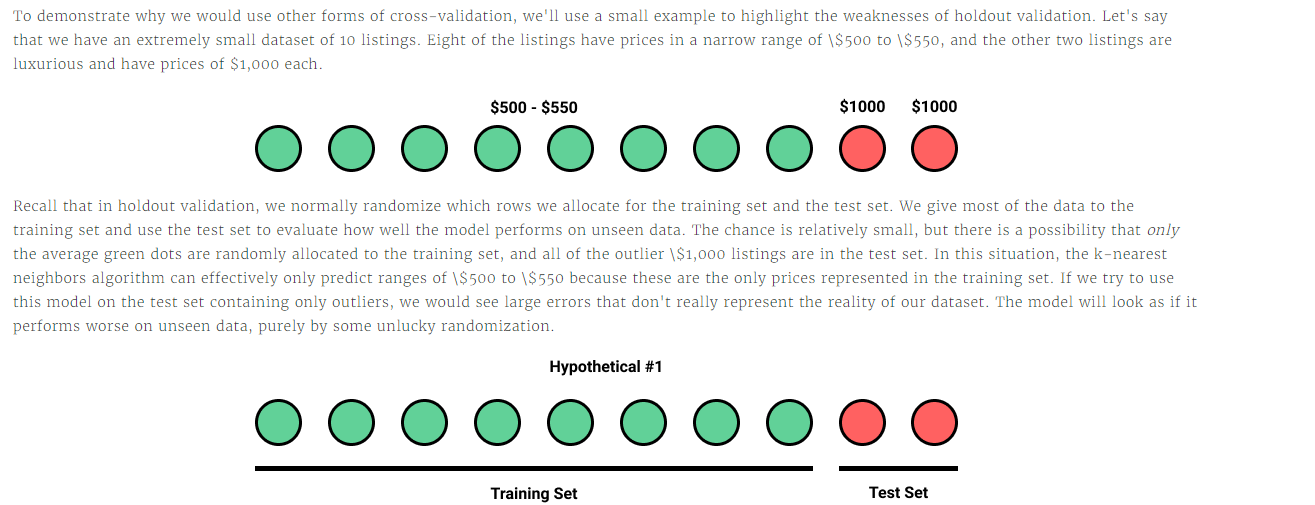

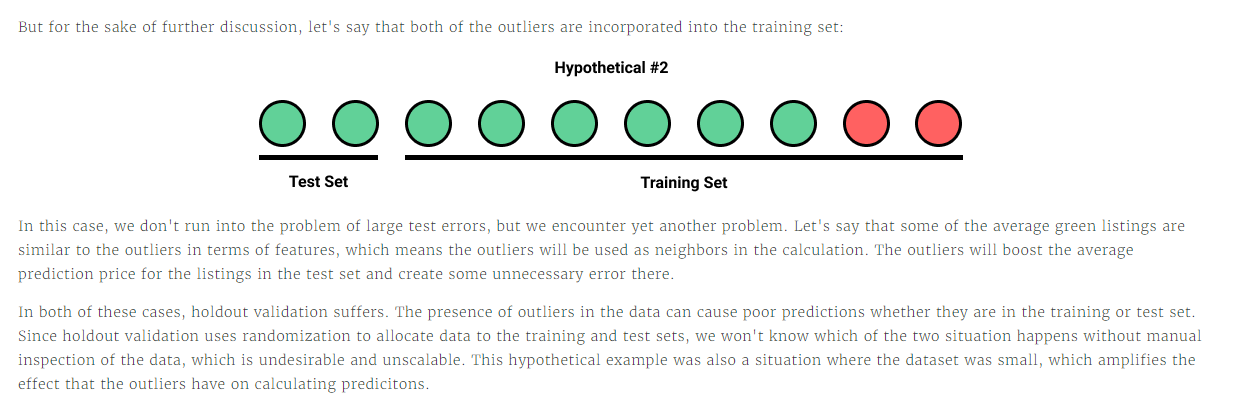

These weaknesses highlight why we should learn other ways to cross-validate the data. We'll focus on a more robust cross-validation technique called **k-fold cross-validation**.

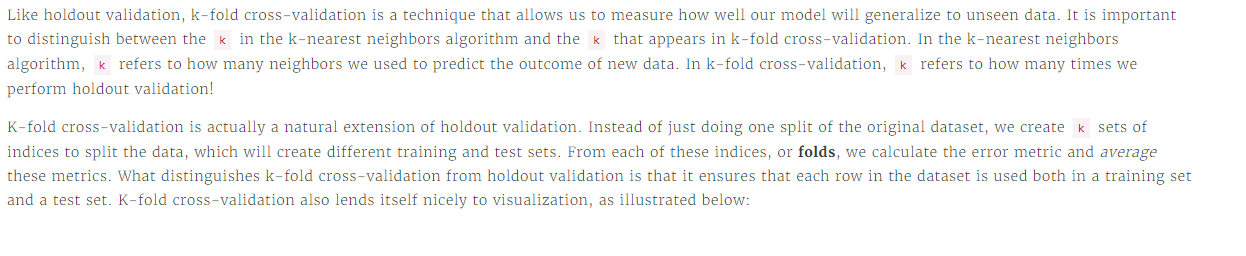

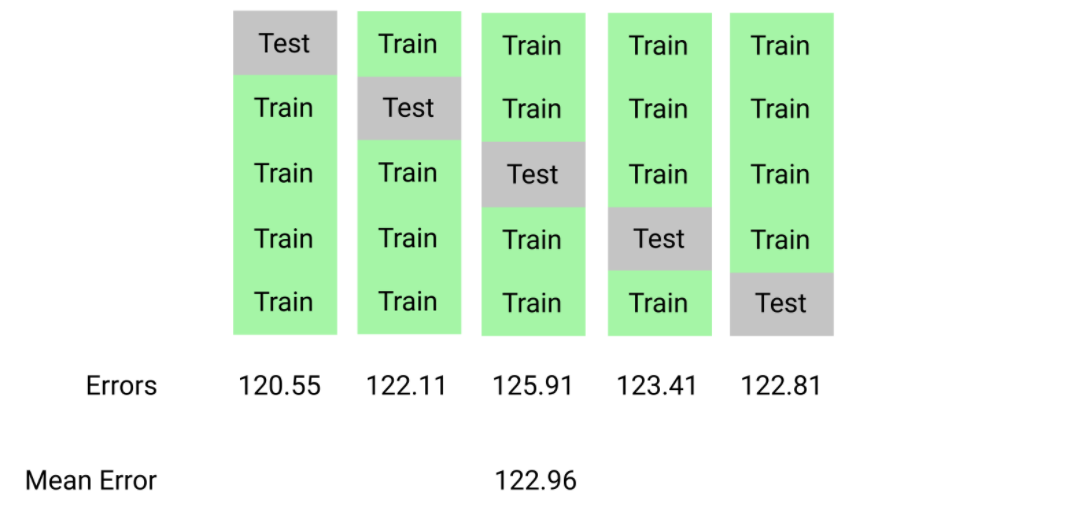

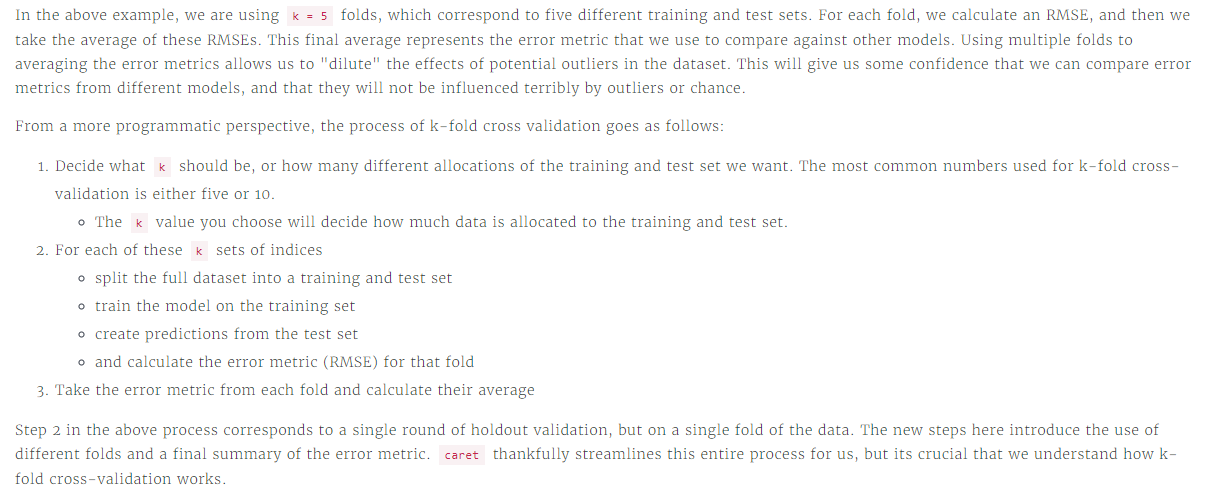

We'll learn about how to handle the first step in this process: Deciding what `k` should be. `k` defines how many folds, or allocations of the training data, we want to use in cross-validation. The most common numbers used for k-fold cross-validation are 5 and 10.

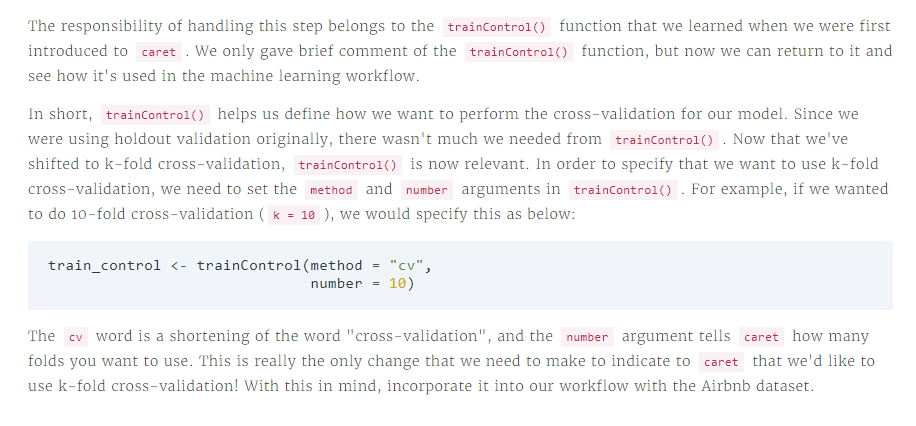

**Task**

* Take the data and split it 80-20 to a training and test set.
* In `trainControl()`, set the correct arguments so that `caret` will use 5-fold cross-validation. 

**Answer**

`set.seed(1)
library(caret)`

`train_indices <- createDataPartition(y = dc_listings[["tidy_price"]], 
                                     p = 0.8, 
                                     list = FALSE)`
                                     
`train_listings <- dc_listings[train_indices,]
test_listings <- dc_listings[-train_indices,]
five_fold_control <- trainControl(method = "cv", number = 5)`

Now that we've learned how to set our model parameters to use 5-fold cross-validation instead of holdout validation, we can move forward and create any model we want.

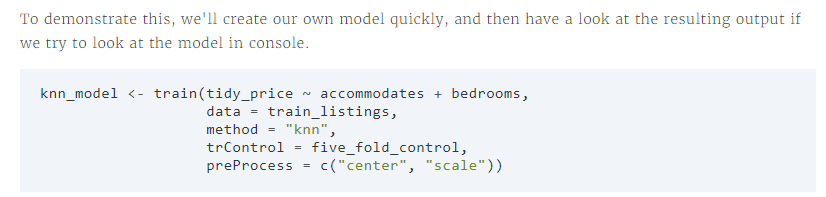

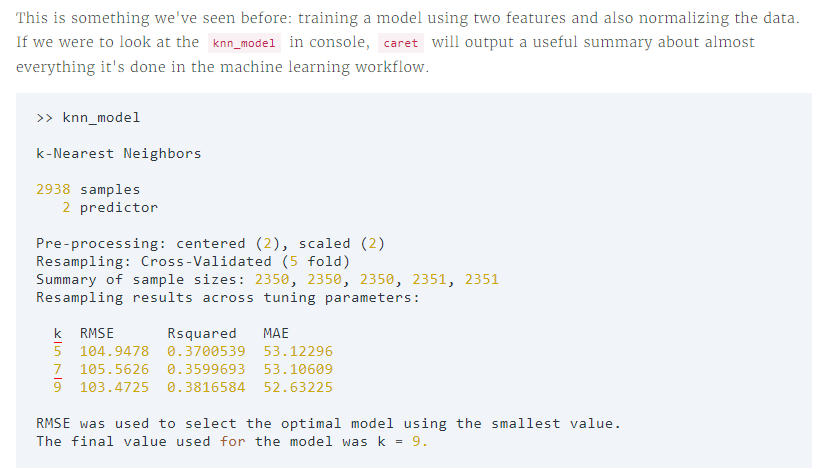

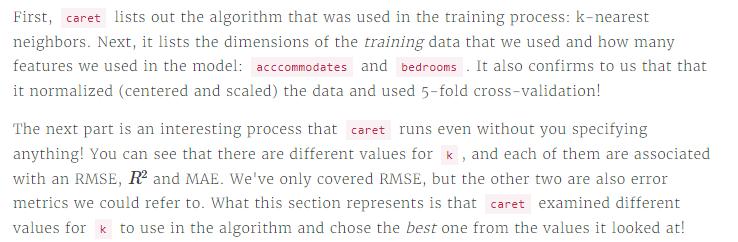

Finally, we see the results of the training, and `caret` concluded that `k = 9` was the best amount of neighbors for this model and the data.

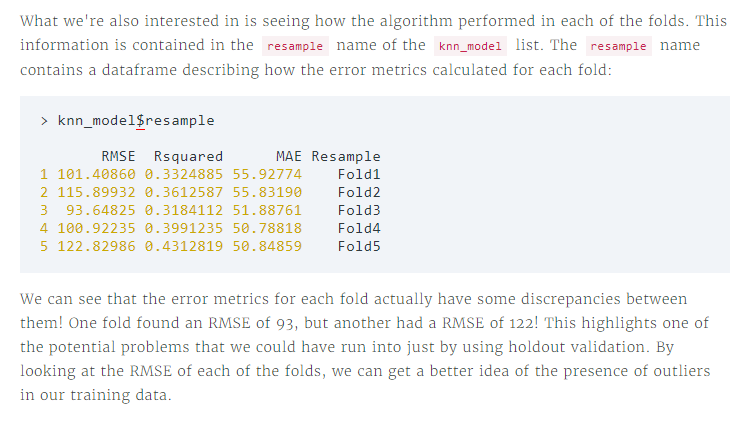

After some deliberation and discussion, researchers have decided that using either five or 10 folds was a good amount. To understand what they meant by "good", we need to understand an important idea in machine leaning called the **bias-variance tradeoff**. The bias-variance tradeoff appears in many different forms in machine learning, and k-fold cross-validation is once of those instances.

**Bias** is a statement about accuracy. When we are trying to estimate or predict a value, we want to know how far the estimate is from the actual. The difference betwen the prediction and the actual value is called the bias. 

**Variance** is a description of the spread of values. If we try to estimate a value and get many different values, then there's a high variance in the estimates. If all of them are close to the target value, then we would say the estimates have low variance.

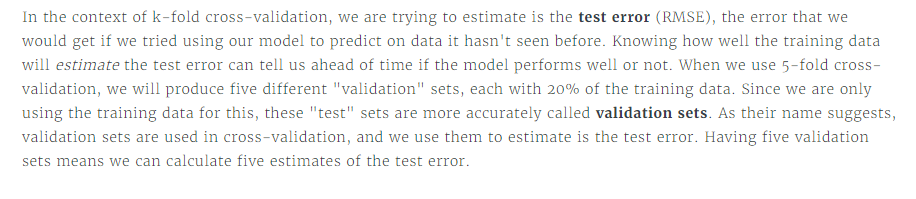

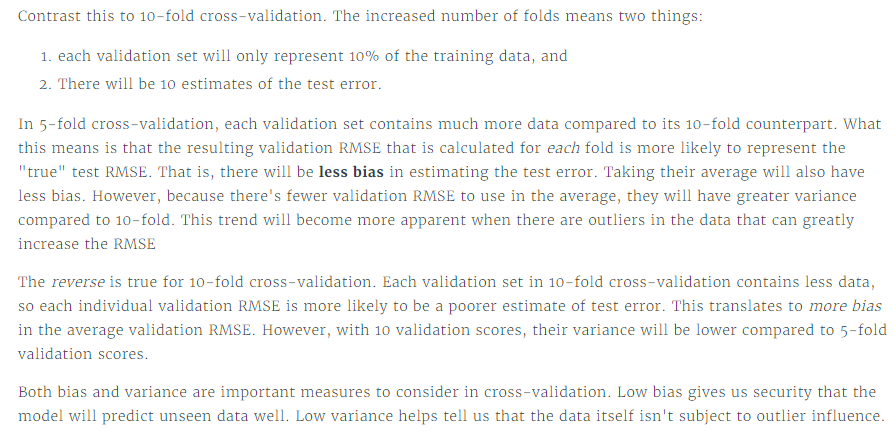

**Task**

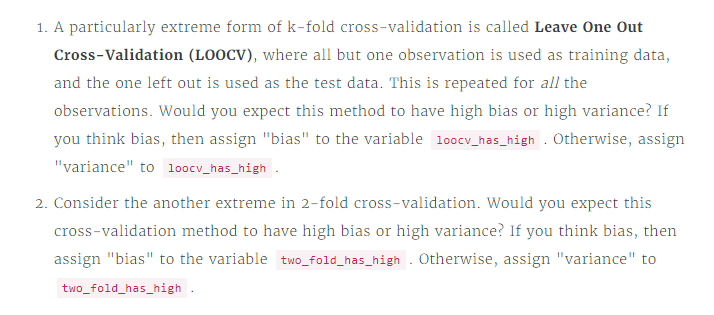

**Answer**

`loocv_has_high <- "bias"
two_fold_has_high <- "variance"`

Using less folds allows us to lower our bias, while more folds lower our variance. Let's take this idea and create two different models to confirm what we've learned. Knowing what happens as the number of folds changes is useful, but it's helpful to see it in the context of real models.

**Task**

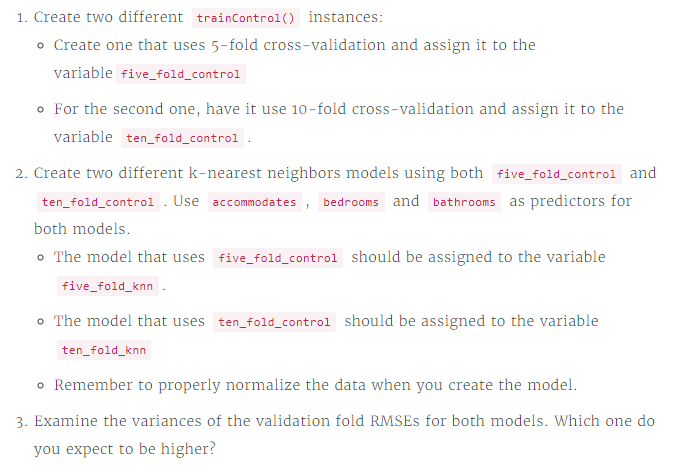

**Answer**

`set.seed(1)
library(caret)
train_indices <- createDataPartition(dc_listings$tidy_price, p = 0.8, list = FALSE)
train_listings <- dc_listings[train_indices,]
test_listings <- dc_listings[-train_indices,]`


`five_fold_control <- trainControl(method = "cv", number = 5)`

`ten_fold_control <- trainControl(method = "cv", number = 10)`

`five_old_knn <- train(tidy_price ~ accommodates + bedrooms + bathrooms, 
                      data = train_listings, 
                      method = "knn", 
                      trControl = five_fold_control)`
                      
`ten_old_knn <- train(tidy_price ~ accommodates + bedrooms + bathrooms, 
                      data = train_listings, 
                      method = "knn", 
                      trControl = ten_fold_control)`

In all our future machine learning projects, we should consider using k-fold cross-validation instead of holdout validation. 